In [1]:
from scipy.stats import kruskal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_json('../data_deliverable/data/preprocessed_items.json')

In [3]:
def compare_price_by_location(data):
    """
    Performs a Kruskal-Wallis H-test to compare price distributions by location.
    
    Parameters:
    data (DataFrame): A pandas DataFrame with 'price' and 'location' columns.
    
    Returns:
    stat (float) and p_value (float)
    """
    #extract the first word from the 'location' string
    data['location'] = data['location'].str.extract(r'(\b\w+\b)', expand=False).str.lower()
    groups = data.groupby('location')['price'].apply(list)
    # for location, prices in groups.items():
    #     print(f"Location: {location}, Prices: {prices}")
    
    # Perform the Kruskal-Wallis H-test
    stat, p_value = kruskal(*groups)
    print('Kruskal-Wallis H-test result: Stat=%.3f, p=%.3f' % (stat, p_value))
    
    #Return the test statistic and p-value
    return stat, p_value


In [4]:
compare_price_by_location(data)

Kruskal-Wallis H-test result: Stat=914.337, p=0.000


(914.3372139402047, 2.2368559320322443e-106)

In [5]:
def compare_price_by_category(data):
    """
    Performs a Kruskal-Wallis H-test to compare price distributions by category.
    
    Parameters:
    data (DataFrame): A pandas DataFrame with 'price' and 'location' columns.
    
    Returns:
    stat (float) and p_value (float)
    """
    groups = data.groupby('category')['price'].apply(list)
    # print(len(groups))
    # for category, prices in groups.items():
    #     print(f"Location: {category}, Prices: {prices}")
    
    # Perform the Kruskal-Wallis H-test
    stat, p_value = kruskal(*groups)
    print('Kruskal-Wallis H-test result: Stat=%.3f, p=%.3f' % (stat, p_value))
    
    #Return the test statistic and p-value
    return stat, p_value

In [6]:
compare_price_by_category(data)

Kruskal-Wallis H-test result: Stat=1163.701, p=0.000


(1163.7007398199833, 1.8094659679910423e-205)

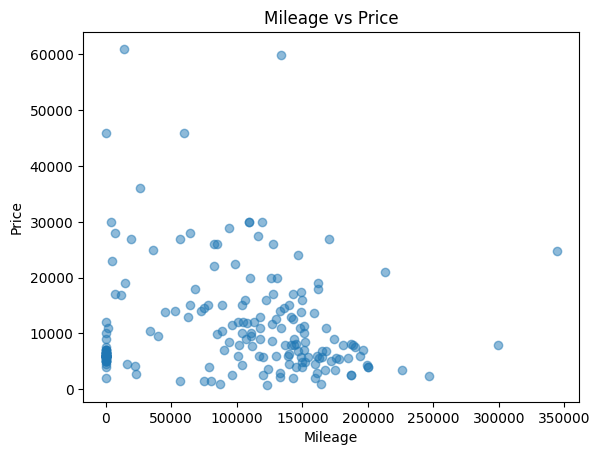

In [7]:
filtered_data = data[data['mileage'].notna()]
plt.scatter(filtered_data['mileage'], filtered_data['price'], alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [8]:
filtered_data = data[data['mileage'].notna()]

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



In [9]:
# Remove outliers from 'mileage'
filtered_data = remove_outliers(filtered_data, 'mileage')

# Remove outliers from 'price'
filtered_data = remove_outliers(filtered_data, 'price')
len(filtered_data)

184

In [10]:
def linear_regression(data):
    X= data['mileage']
    y = data['price']
    
    
    X = np.array(X).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
    model = LinearRegression()
 
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)         
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print("Mean Squared Error on Training Set:", train_mse)
    print("Mean Squared Error on Testing Set:", test_mse)   
   
    score = model.score(X_test, y_test)
    print("The correlation coefficient on Test set:", score)
    
    plt.scatter(X_test, y_test, color ='blue', alpha=0.5)
    plt.plot(X_test,y_test_pred, color ='black')
    plt.title('Mileage vs Price')
    plt.xlabel('Mileage')
    plt.ylabel('Price')
    
    plt.show()
    return train_mse, test_mse, score

Mean Squared Error on Training Set: 33699795.680239655
Mean Squared Error on Testing Set: 25951609.13328298
The correlation coefficient on Test set: -0.08099521294104406


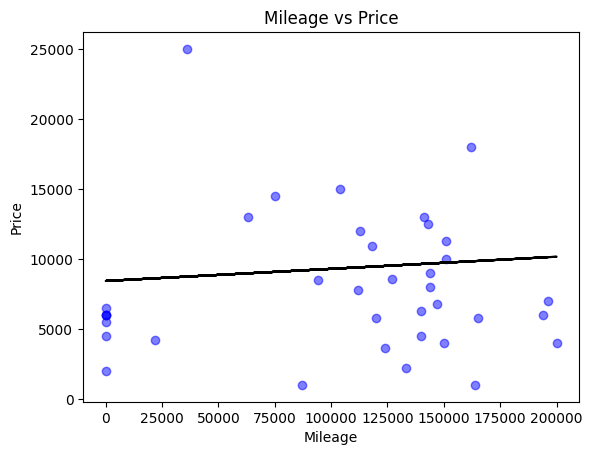

(33699795.680239655, 25951609.13328298, -0.08099521294104406)

In [11]:
linear_regression(filtered_data)

